In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from PIL import Image
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from keras.applications.vgg16 import preprocess_input

In [ ]:
import os
import zipfile

# Check if the zip file exists
if not os.path.exists('yoga-poses-dataset.zip'):
    print("Error: yoga-poses-dataset.zip not found. Please upload the file.")
else:
    try:
        with zipfile.ZipFile('yoga-poses-dataset.zip', 'r') as zip_ref:
            zip_ref.extractall('.')  # Extract to the current directory
        print("Dataset extracted successfully.")
    except zipfile.BadZipFile:
        print("Error: Invalid zip file. Please upload a valid yoga-poses-dataset.zip file.")


Dataset extracted successfully.


In [ ]:
train_dir = 'DATASET/TRAIN'
test_dir = 'DATASET/TEST'

In [ ]:
train_datagen = ImageDataGenerator(width_shift_range= 0.1,
                                  horizontal_flip = True,
                                  rescale = 1./255,
                                  validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 validation_split = 0.2)

In [ ]:
train_generator =  train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (224,224),
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical',
                                                    batch_size = 16,
                                                    subset = 'training')
validation_generator  = test_datagen.flow_from_directory(directory = test_dir,
                                                  target_size = (224,224),
                                                  color_mode = 'rgb',
                                                  class_mode = 'categorical',
                                                  subset = 'validation')

Found 866 images belonging to 5 classes.
Found 92 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential()

# Add the layers to the model
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Assuming you have already defined and compiled your model
optimizer = Adam(learning_rate=0.001)  # Define Adam optimizer with specific learning rate

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Specify training hyperparameters
epochs = 50
batch_size = 16

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │     205,521,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           5,125 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 205,897,861 (785.44 MB)

 Trainable params: 205,897,861 (785.44 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
history = model.fit(train_generator, epochs = epochs,validation_data = validation_generator)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


55/55 ━━━━━━━━━━━━━━━━━━━━ 47s 562ms/step - accuracy: 0.2038 - loss: 5.6479 - val_accuracy: 0.2283 - val_loss: 1.5995
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 22s 358ms/step - accuracy: 0.2308 - loss: 1.5981 - val_accuracy: 0.3696 - val_loss: 1.5388
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 22s 346ms/step - accuracy: 0.3061 - loss: 1.5462 - val_accuracy: 0.4239 - val_loss: 1.4163
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 39s 311ms/step - accuracy: 0.3415 - loss: 1.5032 - val_accuracy: 0.5217 - val_loss: 1.3512
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 340ms/step - accuracy: 0.4031 - loss: 1.4434 - val_accuracy: 0.6087 - val_loss: 1.1386
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 341ms/step - accuracy: 0.4355 - loss: 1.4298 - val_accuracy: 0.6522 - val_loss: 1.0767
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 323ms/step - accuracy: 0.5425 - loss: 1.2430 - val_accuracy: 0.7391 - val_loss: 0.8107
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 40s 316ms/step - accuracy: 0.5706 - loss: 1.1270 - val_accuracy: 0.771

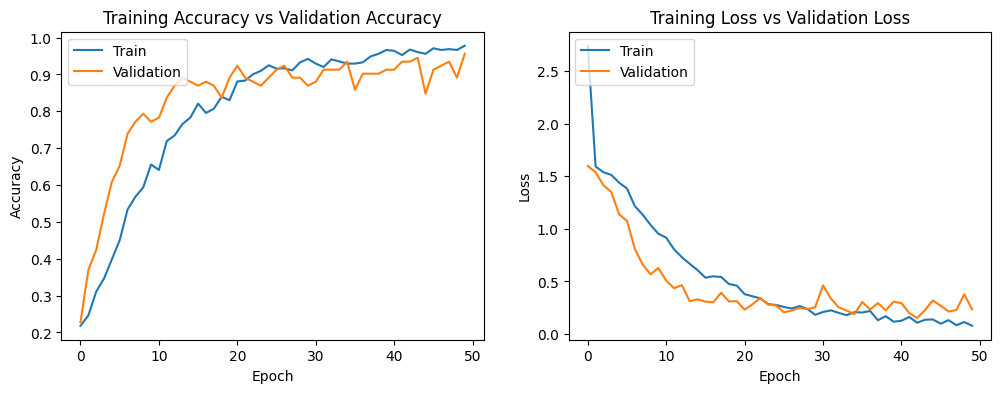

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 310ms/step - accuracy: 0.9888 - loss: 0.0255
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 741ms/step - accuracy: 0.9392 - loss: 0.2892
final train accuracy = 98.96 , validation accuracy = 95.65


In [ ]:
model.save('FitTip.keras')

In [ ]:
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
model = load_model('FitTip.keras')


In [ ]:
img = image.load_img('DATASET/TEST/tree/00000056.jpg', target_size=(224, 224))
# img = image.load_img('DATASET/TEST/goddess/00000010.jpg', target_size=(224, 224))
# img = image.load_img('DATASET/TEST/plank/00000018.jpg', target_size=(224, 224))
# img = image.load_img('DATASET/TEST/tree/00000010.jpg', target_size=(224, 224))
# img = image.load_img('DATASET/TEST/warrior2/00000038.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
class_labels = ['downdog', 'goddess', 'plank', 'tree', 'warrior2']
predicted_class_index = np.argmax(classes)
predicted_class_label = class_labels[predicted_class_index]
print(predicted_class_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
tree


In [ ]:
from keras.models import load_model
model = load_model('FitTip.keras')

In [ ]:
class_labels = ['downdog', 'goddess', 'plank', 'warrior2', 'tree']

# Open a video capture object (0 for default camera)
cap = cv2.VideoCapture(1)

while True:
    ret, frame = cap.read()  # Read a frame from the video capture

    if not ret:
        break

    # Resize frame to match model input size (224x224)
    resized_frame = cv2.resize(frame, (224, 224))

    # Preprocess the frame for the model
    x = image.img_to_array(resized_frame)
    x = np.expand_dims(x, axis=0)
    img_data = preprocess_input(x)

    # Predict classes using the model
    classes = model.predict(img_data)

    # Get the predicted class label
    predicted_class_index = np.argmax(classes)
    predicted_class_label = class_labels[predicted_class_index]

    # Display the predicted class label on the frame
    cv2.putText(frame, predicted_class_label, (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Show the frame with the predicted label
    cv2.imshow('Yoga Pose Classifier', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()